# ML for Portfolio Construction

In [1]:
# Financial data
from pandas_datareader import data as wb

# Data analysis and manipulation
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Statistics and ML
from statsmodels.tsa.api import adfuller
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix, classification_report

from scipy.spatial.distance import cdist

import warnings
warnings.simplefilter('ignore')

In [2]:
# Importing data
# I got this data from github user MarcusColeman
fundamentals = pd.ExcelFile('SPO_Data.xlsx')

In [3]:
#parsing the Fundamentals sheet from our Excel file of which holds our P/E, EPS, and MarketCap data
features = fundamentals.parse('Fundamentals').drop('Unnamed: 0', axis=1)

In [4]:
features

,Symbol,Name,P/E,EPS,MarketCap
0,MMM,3M Company,23.17,8.16,112.74
1,ABT,Abbott Laboratories,48.03,0.94,77.76
2,ABBV,AbbVie,17.55,3.63,101.52
3,ACN,Accenture plc,18.37,6.76,77.29
4,ATVI,Activision Blizzard,37.55,1.28,36.13
...,...,...,...,...,...
500,YHOO,Yahoo Inc.,NaN,-0.23,43.74
501,YUM,Yum! Brands Inc,15.83,4.04,22.65
502,ZBH,Zimmer Biomet Holdings,77.53,1.51,23.54
503,ZION,Zions Bancorp,22.75,1.99,9.17


In [5]:
# Drop name column
features = features.drop('Name', axis=1).set_index('Symbol').fillna(0)

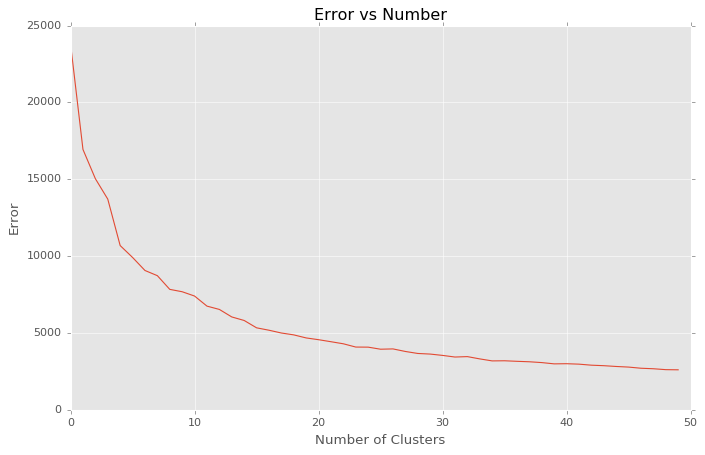

In [6]:
#intializing a list to hold costs or errors
costs=[]
    
#iterating over possible values for k
for k in range(1,51):
    model = KMeans(n_clusters=k) 
    model.fit(features)
    costs.append(sum(np.min(cdist(features,model.cluster_centers_,'euclidean'),axis=1)))
    
#plotting our elbow graph    
with plt.style.context(['classic','ggplot']):
    plt.figure(figsize=(10,6))
    plt.plot(costs)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Error')
    plt.title('Error vs Number')
    plt.show()

#### Let's use 15!

In [7]:
# initialzing K-Means algorithm
kmeans=KMeans(n_clusters=15,random_state=0)
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [8]:
# Adding cluster labels to dataframe
features['Cluster']=kmeans.labels_

In [9]:
features

,P/E,EPS,MarketCap,Cluster
Symbol,,,,
MMM,23.17,8.16,112.74,10
ABT,48.03,0.94,77.76,10
ABBV,17.55,3.63,101.52,10
ACN,18.37,6.76,77.29,10
ATVI,37.55,1.28,36.13,7
...,...,...,...,...
YHOO,0.00,-0.23,43.74,7
YUM,15.83,4.04,22.65,7
ZBH,77.53,1.51,23.54,6


In [10]:
#creating dataframe to hold data
clusters_df=pd.DataFrame()
#grouping our data by cluster for clusters with atleast 2 stocks in it.
clusters_df=pd.concat(i for clusters_df, i in features.groupby(features['Cluster']) if len(i) >1)

In [11]:
from collections import Counter
Counter(clusters_df['Cluster'])

Counter({0: 46,
         1: 3,
         2: 101,
         3: 19,
         4: 2,
         5: 4,
         6: 26,
         7: 97,
         9: 5,
         10: 36,
         12: 160,
         13: 3})

In [12]:
clusters_df

,P/E,EPS,MarketCap,Cluster
Symbol,,,,
ADBE,51.72,2.32,59.28,0
AET,20.37,6.41,45.93,0
AXP,14.08,5.65,71.72,0
AIG,0.00,-0.78,62.15,0
ANTM,18.02,9.21,43.89,0
...,...,...,...,...
ZION,22.75,1.99,9.17,12
ZTS,32.16,1.65,26.11,12
EQIX,209.05,1.79,26.88,13


In [13]:
#creating method to identify each possible pair 
def create_pairs(symbolList):
    #creating a list to hold each possible pair
    pairs=[]
    #initializing placeholders for the symbols in each pair
    x=0
    y=0
    for count,symbol in enumerate(symbolList):
        for nextCount,nextSymbol in enumerate(symbolList):
            x=symbol
            y=nextSymbol
            if x !=y:
                pairs.append([x,y])          
    
    return pairs

In [14]:
#list of lists of pairs for cluster 0
all_pairs=create_pairs(clusters_df[clusters_df.Cluster == 0].index)

In [15]:
all_pairs

[['ADBE', 'AET'],
 ['ADBE', 'AXP'],
 ['ADBE', 'AIG'],
 ['ADBE', 'ANTM'],
 ['ADBE', 'ADP'],
 ['ADBE', 'BIIB'],
 ['ADBE', 'BLK'],
 ['ADBE', 'COF'],
 ['ADBE', 'CAT'],
 ['ADBE', 'SCHW'],
 ['ADBE', 'CB'],
 ['ADBE', 'CL'],
 ['ADBE', 'COP'],
 ['ADBE', 'COST'],
 ['ADBE', 'CSX'],
 ['ADBE', 'DHR'],
 ['ADBE', 'D'],
 ['ADBE', 'DD'],
 ['ADBE', 'DUK'],
 ['ADBE', 'EOG'],
 ['ADBE', 'FDX'],
 ['ADBE', 'F'],
 ['ADBE', 'GD'],
 ['ADBE', 'GM'],
 ['ADBE', 'HAL'],
 ['ADBE', 'ITW'],
 ['ADBE', 'KMB'],
 ['ADBE', 'LOW'],
 ['ADBE', 'MDLZ'],
 ['ADBE', 'MON'],
 ['ADBE', 'NEE'],
 ['ADBE', 'NVDA'],
 ['ADBE', 'OXY'],
 ['ADBE', 'PYPL'],
 ['ADBE', 'PNC'],
 ['ADBE', 'PRU'],
 ['ADBE', 'RTN'],
 ['ADBE', 'SPG'],
 ['ADBE', 'SO'],
 ['ADBE', 'SYK'],
 ['ADBE', 'BK'],
 ['ADBE', 'TMO'],
 ['ADBE', 'TJX'],
 ['ADBE', 'FOXA'],
 ['ADBE', 'FOX'],
 ['AET', 'ADBE'],
 ['AET', 'AXP'],
 ['AET', 'AIG'],
 ['AET', 'ANTM'],
 ['AET', 'ADP'],
 ['AET', 'BIIB'],
 ['AET', 'BLK'],
 ['AET', 'COF'],
 ['AET', 'CAT'],
 ['AET', 'SCHW'],
 ['AET', 'CB'],
 ['

In [16]:
data = pd.DataFrame()
tickers = list(clusters_df[clusters_df.Cluster == 0].index)
for t in tickers:
    try:
        data[t] = wb.DataReader(t, data_source='yahoo', start='2008-1-1')['Adj Close']
    except:
        print('No data for {}'.format(t))
        tickers.remove(t)

In [17]:
data = data.dropna(axis=1)

In [18]:
data

,ADBE,AXP,AIG,ANTM,ADP,BIIB,BLK,COF,CAT,SCHW,CB,CL,COP,COST,CSX,DHR,D,DD,DUK,EOG,FDX,F,GD,HAL,ITW,KMB,LOW,MDLZ,NEE,NVDA,OXY,PNC,PRU,SPG,SO,SYK,BK,TMO,TJX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,41.709999,41.340916,783.817749,74.616707,27.174238,55.869999,154.511963,37.565029,47.980984,20.814548,37.269367,28.607353,43.486012,51.291889,11.274719,21.170488,27.360579,34.679012,31.995611,41.116886,77.640686,4.454113,64.340782,31.480856,38.129143,42.166279,17.616068,15.401873,43.805534,30.358782,48.826729,47.122929,60.898193,48.475979,20.654696,62.812588,36.268463,53.567142,4.689307
2008-01-03,41.790001,40.830635,785.905640,75.474342,26.973047,56.299999,162.039871,37.025547,47.811165,20.983913,37.190006,28.810806,43.664146,50.524105,10.898460,21.352291,27.307650,34.482132,32.092808,41.968147,78.676971,4.352883,65.120773,31.830740,37.778316,42.386848,17.282484,15.281732,44.214870,30.119659,50.172825,46.591503,61.065403,47.375271,20.649290,63.008888,37.838326,54.728714,4.664223
2008-01-04,40.360001,39.801971,769.895386,75.105553,25.778435,55.220001,151.404633,36.470192,46.554390,20.281065,37.086212,29.140003,42.333195,49.417557,10.568911,20.819172,27.313522,33.103935,32.076607,40.071964,75.784363,4.136927,63.281181,30.927557,36.908588,42.258186,16.742411,15.113536,45.436287,27.590534,48.459030,45.535896,60.496902,44.908596,20.974390,61.669003,37.053387,53.701542,4.558862
2008-01-07,40.240002,39.980164,783.817749,76.572159,26.338017,59.220001,148.333206,37.168354,46.690262,20.695997,37.513622,29.580175,41.754303,49.665970,10.522207,20.290945,28.060472,33.273964,32.902821,39.914337,75.234711,4.157171,63.214943,30.390539,36.287357,42.576801,16.766233,15.349007,47.555569,24.739513,47.611526,46.205662,60.650730,45.845581,21.397020,62.053020,37.561283,54.642319,4.597327
2008-01-08,39.220001,38.838112,773.375854,75.886047,26.099096,55.970001,144.336014,34.264690,45.616917,19.239492,36.774811,29.583876,40.824112,48.905708,10.465117,19.836432,27.860504,33.005466,32.805622,39.126137,74.594887,4.116680,63.008930,29.747751,34.694088,41.847675,16.297638,15.185617,47.238693,25.263729,46.427464,44.756947,58.430157,43.678047,21.510807,61.788467,36.168411,54.603928,4.446815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,485.910004,107.269997,29.074800,265.600006,136.570007,278.290009,547.380005,74.639999,153.509995,35.730000,120.084938,77.150002,33.520000,342.920013,78.959999,207.929993,80.730003,59.430000,84.379997,39.169998,236.339996,7.120000,147.470001,14.330000,198.220001,148.500000,165.190002,58.009998,281.920013,514.890015,10.170000,114.180000,69.760002,67.800003,52.860001,205.509995,35.959999,434.100006,55.470001
2020-09-15,497.670013,106.680000,28.610001,260.149994,136.970001,278.450012,548.159973,73.300003,148.600006,34.750000,116.886124,76.940002,33.799999,343.910004,80.269997,208.690002,80.900002,59.549999,84.449997,38.590000,236.669998,7.040000,145.139999,14.440000,198.639999,146.479996,169.029999,58.090000,295.700012,519.640015,10.710000,111.290001,68.360001,71.070000,53.009998,210.500000,34.869999,435.100006,56.860001
2020-09-16,476.000000,105.980003,29.770000,263.619995,137.710007,276.390015,561.729980,76.169998,151.110001,35.730000,117.809998,76.910004,35.080002,343.730011,79.349998,207.050003,81.599998,60.169998,84.839996,40.860001,250.300003,7.020000,146.779999,15.070000,199.500000,147.750000,166.710007,57.970001,280.350006,500.579987,11.640000,113.639999,69.320000,74.120003,53.290001,215.809998,35.570000,433.880005,57.320000


In [19]:
train = data[:2877]
test = data[2877:]

In [20]:
def get_cointegrated(all_pairs,df,larger_CI=False):
    
    #creating a list to hold cointegrated pairs
    cointegrated=[]
    
        
    #iterate over each pair in possible pairs list; pair is a list of our 2 stock symbols
    for count, pair in enumerate(all_pairs):
        try:
            
            #getting data for each stock in pair from df
            ols=linregress(df[str(pair[1])],df[str(pair[0])]) #note scipy's linregress takes in Y then X
                        
            #storing slope or hedge ratio in variable
            slope=ols[0]
            
            
            #creating spread 
            spread=df[str(pair[1])]-(slope*df[str(pair[0])])
                       
            #testing spread for cointegration
            cadf=adfuller(spread,1)
            
            #checking to see if spread is cointegrated, if so then store pair in cointegrated list
            if cadf[0] < cadf[4]['1%']:
                print('{} and {} Pair Cointegrated at 99% Confidence Interval'.format(pair[0],pair[1]))
                #appending the X and Y of pair
                cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['5%']:
                print('{} and {} Pair Cointegrated at 95% Confidence Interval'.format(pair[0],pair[1]))
                #appending the X and Y of pair
                if larger_CI:
                    cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['10%']:
                print('{} and {} Pair Cointegrated at 90% Confidence Interval'.format(pair[0],pair[1]))
                cointegrated.append(pair[0],pair[1])
            else:
                print('{} and {} Pair Not Cointegrated :('.format(pair[0],pair[1]))
                continue
        except:
            print('Exception: Symbol not in Dataframe')
            continue
        
    return cointegrated

In [21]:
pairs = create_pairs(train.columns)

In [31]:
cointegrated_cl0 = get_cointegrated(pairs,train)

ADBE and AXP Pair Not Cointegrated :(
ADBE and AIG Pair Cointegrated at 99% Confidence Interval
ADBE and ANTM Pair Cointegrated at 99% Confidence Interval
ADBE and ADP Pair Not Cointegrated :(
ADBE and BIIB Pair Not Cointegrated :(
ADBE and BLK Pair Not Cointegrated :(
ADBE and COF Pair Not Cointegrated :(
ADBE and CAT Pair Not Cointegrated :(
ADBE and SCHW Pair Not Cointegrated :(
ADBE and CB Pair Not Cointegrated :(
ADBE and CL Pair Not Cointegrated :(
ADBE and COP Pair Not Cointegrated :(
ADBE and COST Pair Not Cointegrated :(
ADBE and CSX Pair Not Cointegrated :(
ADBE and DHR Pair Not Cointegrated :(
ADBE and D Pair Not Cointegrated :(
ADBE and DD Pair Not Cointegrated :(
ADBE and DUK Pair Not Cointegrated :(
ADBE and EOG Pair Not Cointegrated :(
ADBE and FDX Pair Not Cointegrated :(
ADBE and F Pair Not Cointegrated :(
ADBE and GD Pair Not Cointegrated :(
ADBE and HAL Pair Not Cointegrated :(
ADBE and ITW Pair Not Cointegrated :(
ADBE and KMB Pair Not Cointegrated :(
ADBE and LOW P

BIIB and LOW Pair Not Cointegrated :(
BIIB and MDLZ Pair Not Cointegrated :(
BIIB and NEE Pair Not Cointegrated :(
BIIB and NVDA Pair Not Cointegrated :(
BIIB and OXY Pair Not Cointegrated :(
BIIB and PNC Pair Not Cointegrated :(
BIIB and PRU Pair Not Cointegrated :(
BIIB and SPG Pair Not Cointegrated :(
BIIB and SO Pair Not Cointegrated :(
BIIB and SYK Pair Not Cointegrated :(
BIIB and BK Pair Not Cointegrated :(
BIIB and TMO Pair Not Cointegrated :(
BIIB and TJX Pair Not Cointegrated :(
BLK and ADBE Pair Not Cointegrated :(
BLK and AXP Pair Not Cointegrated :(
BLK and AIG Pair Cointegrated at 99% Confidence Interval
BLK and ANTM Pair Not Cointegrated :(
BLK and ADP Pair Not Cointegrated :(
BLK and BIIB Pair Not Cointegrated :(
BLK and COF Pair Not Cointegrated :(
BLK and CAT Pair Not Cointegrated :(
BLK and SCHW Pair Not Cointegrated :(
BLK and CB Pair Not Cointegrated :(
BLK and CL Pair Not Cointegrated :(
BLK and COP Pair Not Cointegrated :(
BLK and COST Pair Not Cointegrated :(
BL

CL and COP Pair Not Cointegrated :(
CL and COST Pair Not Cointegrated :(
CL and CSX Pair Not Cointegrated :(
CL and DHR Pair Not Cointegrated :(
CL and D Pair Cointegrated at 95% Confidence Interval
CL and DD Pair Not Cointegrated :(
CL and DUK Pair Not Cointegrated :(
CL and EOG Pair Not Cointegrated :(
CL and FDX Pair Not Cointegrated :(
CL and F Pair Not Cointegrated :(
CL and GD Pair Not Cointegrated :(
CL and HAL Pair Not Cointegrated :(
CL and ITW Pair Not Cointegrated :(
CL and KMB Pair Not Cointegrated :(
CL and LOW Pair Not Cointegrated :(
CL and MDLZ Pair Not Cointegrated :(
CL and NEE Pair Not Cointegrated :(
CL and NVDA Pair Not Cointegrated :(
CL and OXY Pair Not Cointegrated :(
CL and PNC Pair Not Cointegrated :(
CL and PRU Pair Not Cointegrated :(
CL and SPG Pair Not Cointegrated :(
CL and SO Pair Not Cointegrated :(
CL and SYK Pair Not Cointegrated :(
CL and BK Pair Not Cointegrated :(
CL and TMO Pair Not Cointegrated :(
CL and TJX Pair Cointegrated at 90% Confidence In

DD and CAT Pair Not Cointegrated :(
DD and SCHW Pair Not Cointegrated :(
DD and CB Pair Not Cointegrated :(
DD and CL Pair Not Cointegrated :(
DD and COP Pair Not Cointegrated :(
DD and COST Pair Not Cointegrated :(
DD and CSX Pair Not Cointegrated :(
DD and DHR Pair Not Cointegrated :(
DD and D Pair Not Cointegrated :(
DD and DUK Pair Not Cointegrated :(
DD and EOG Pair Cointegrated at 99% Confidence Interval
DD and FDX Pair Not Cointegrated :(
DD and F Pair Not Cointegrated :(
DD and GD Pair Not Cointegrated :(
DD and HAL Pair Not Cointegrated :(
DD and ITW Pair Not Cointegrated :(
DD and KMB Pair Not Cointegrated :(
DD and LOW Pair Not Cointegrated :(
DD and MDLZ Pair Not Cointegrated :(
DD and NEE Pair Not Cointegrated :(
DD and NVDA Pair Not Cointegrated :(
DD and OXY Pair Not Cointegrated :(
DD and PNC Pair Not Cointegrated :(
DD and PRU Pair Cointegrated at 99% Confidence Interval
DD and SPG Pair Not Cointegrated :(
DD and SO Pair Not Cointegrated :(
DD and SYK Pair Not Cointegr

HAL and DD Pair Not Cointegrated :(
HAL and DUK Pair Not Cointegrated :(
HAL and EOG Pair Not Cointegrated :(
HAL and FDX Pair Not Cointegrated :(
HAL and F Pair Not Cointegrated :(
HAL and GD Pair Not Cointegrated :(
HAL and ITW Pair Not Cointegrated :(
HAL and KMB Pair Not Cointegrated :(
HAL and LOW Pair Not Cointegrated :(
HAL and MDLZ Pair Not Cointegrated :(
HAL and NEE Pair Not Cointegrated :(
HAL and NVDA Pair Not Cointegrated :(
HAL and OXY Pair Cointegrated at 95% Confidence Interval
HAL and PNC Pair Not Cointegrated :(
HAL and PRU Pair Not Cointegrated :(
HAL and SPG Pair Not Cointegrated :(
HAL and SO Pair Not Cointegrated :(
HAL and SYK Pair Not Cointegrated :(
HAL and BK Pair Not Cointegrated :(
HAL and TMO Pair Not Cointegrated :(
HAL and TJX Pair Not Cointegrated :(
ITW and ADBE Pair Not Cointegrated :(
ITW and AXP Pair Not Cointegrated :(
ITW and AIG Pair Cointegrated at 99% Confidence Interval
ITW and ANTM Pair Not Cointegrated :(
ITW and ADP Pair Not Cointegrated :(


NVDA and CSX Pair Not Cointegrated :(
NVDA and DHR Pair Not Cointegrated :(
NVDA and D Pair Not Cointegrated :(
NVDA and DD Pair Not Cointegrated :(
NVDA and DUK Pair Not Cointegrated :(
NVDA and EOG Pair Not Cointegrated :(
NVDA and FDX Pair Not Cointegrated :(
NVDA and F Pair Not Cointegrated :(
NVDA and GD Pair Not Cointegrated :(
NVDA and HAL Pair Not Cointegrated :(
NVDA and ITW Pair Not Cointegrated :(
NVDA and KMB Pair Not Cointegrated :(
NVDA and LOW Pair Not Cointegrated :(
NVDA and MDLZ Pair Not Cointegrated :(
NVDA and NEE Pair Not Cointegrated :(
NVDA and OXY Pair Not Cointegrated :(
NVDA and PNC Pair Not Cointegrated :(
NVDA and PRU Pair Not Cointegrated :(
NVDA and SPG Pair Not Cointegrated :(
NVDA and SO Pair Not Cointegrated :(
NVDA and SYK Pair Not Cointegrated :(
NVDA and BK Pair Not Cointegrated :(
NVDA and TMO Pair Not Cointegrated :(
NVDA and TJX Pair Not Cointegrated :(
OXY and ADBE Pair Not Cointegrated :(
OXY and AXP Pair Not Cointegrated :(
OXY and AIG Pair Coi

SYK and FDX Pair Not Cointegrated :(
SYK and F Pair Not Cointegrated :(
SYK and GD Pair Not Cointegrated :(
SYK and HAL Pair Not Cointegrated :(
SYK and ITW Pair Not Cointegrated :(
SYK and KMB Pair Not Cointegrated :(
SYK and LOW Pair Not Cointegrated :(
SYK and MDLZ Pair Not Cointegrated :(
SYK and NEE Pair Cointegrated at 99% Confidence Interval
SYK and NVDA Pair Not Cointegrated :(
SYK and OXY Pair Not Cointegrated :(
SYK and PNC Pair Not Cointegrated :(
SYK and PRU Pair Not Cointegrated :(
SYK and SPG Pair Not Cointegrated :(
SYK and SO Pair Not Cointegrated :(
SYK and BK Pair Not Cointegrated :(
SYK and TMO Pair Not Cointegrated :(
SYK and TJX Pair Not Cointegrated :(
BK and ADBE Pair Not Cointegrated :(
BK and AXP Pair Not Cointegrated :(
BK and AIG Pair Cointegrated at 99% Confidence Interval
BK and ANTM Pair Not Cointegrated :(
BK and ADP Pair Not Cointegrated :(
BK and BIIB Pair Not Cointegrated :(
BK and BLK Pair Not Cointegrated :(
BK and COF Pair Not Cointegrated :(
BK and

In [32]:
cointegrated_cl0

[['ADBE', 'AIG'],
 ['ADBE', 'ANTM'],
 ['AXP', 'AIG'],
 ['AIG', 'AXP'],
 ['AIG', 'ADP'],
 ['AIG', 'COF'],
 ['AIG', 'CAT'],
 ['AIG', 'SCHW'],
 ['AIG', 'CB'],
 ['AIG', 'CL'],
 ['AIG', 'COP'],
 ['AIG', 'CSX'],
 ['AIG', 'DHR'],
 ['AIG', 'D'],
 ['AIG', 'DD'],
 ['AIG', 'DUK'],
 ['AIG', 'EOG'],
 ['AIG', 'F'],
 ['AIG', 'HAL'],
 ['AIG', 'ITW'],
 ['AIG', 'KMB'],
 ['AIG', 'LOW'],
 ['AIG', 'MDLZ'],
 ['AIG', 'NEE'],
 ['AIG', 'OXY'],
 ['AIG', 'PNC'],
 ['AIG', 'SPG'],
 ['AIG', 'SO'],
 ['AIG', 'BK'],
 ['AIG', 'TJX'],
 ['ANTM', 'AIG'],
 ['ADP', 'AIG'],
 ['BIIB', 'AIG'],
 ['BLK', 'AIG'],
 ['COF', 'AIG'],
 ['COF', 'DD'],
 ['COF', 'EOG'],
 ['COF', 'PRU'],
 ['CAT', 'AIG'],
 ['SCHW', 'AIG'],
 ['CB', 'AIG'],
 ['CL', 'AIG'],
 ['COP', 'AIG'],
 ['COST', 'AIG'],
 ['CSX', 'AIG'],
 ['DHR', 'AIG'],
 ['D', 'AIG'],
 ['DD', 'AIG'],
 ['DD', 'COF'],
 ['DD', 'EOG'],
 ['DD', 'PRU'],
 ['DUK', 'AIG'],
 ['EOG', 'AIG'],
 ['EOG', 'COF'],
 ['EOG', 'DD'],
 ['EOG', 'PRU'],
 ['FDX', 'AIG'],
 ['FDX', 'GD'],
 ['F', 'AIG'],
 ['GD', 'A

In [33]:
def get_stocks(lst):
    stocks = []
    
    for pair in lst:
        for stock in pair:
            if not stock in stocks:
                stocks.append(stock)
    
    return stocks

In [34]:
stocks = get_stocks(cointegrated_cl0)

In [35]:
def get_stock_data(stocks, start, end=None):
    
    data = pd.DataFrame()
    for stock in stocks:
        data[stock] = wb.DataReader(stock, data_source='yahoo', start=start, end=end)['Adj Close']
        print('Done {}'.format(stock))
    return data

In [36]:
data0 = get_stock_data(stocks, start='01-01-2019')

Done ADBE
Done AIG
Done ANTM
Done AXP
Done ADP
Done COF
Done CAT
Done SCHW
Done CB
Done CL
Done COP
Done CSX
Done DHR
Done D
Done DD
Done DUK
Done EOG
Done F
Done HAL
Done ITW
Done KMB
Done LOW
Done MDLZ
Done NEE
Done OXY
Done PNC
Done SPG
Done SO
Done BK
Done TJX
Done BIIB
Done BLK
Done PRU
Done COST
Done FDX
Done GD
Done SYK
Done NVDA
Done TMO


In [37]:
from scipy.stats import linregress

In [38]:
class statarb(object):
    
    def __init__(self,df1,df2,ma,floor,ceiling,beta_lookback,start,end,exit_zscore=0):
        #setting the attributes 
        self.df1=df1 #array of prices for X
        self.df2=df2 #array of prices for Y
        self.ma=ma# the lookback period 
        self.floor=floor #the buy threshold for the z-score
        self.ceiling=ceiling #the sell threshold for the z-score
        self.Close='Close Long'  #used as close signal for longs
        self.Cover='Cover Short' #used as close signal for shorts
        self.exit_zscore=exit_zscore  #the z-score
        self.beta_lookback=beta_lookback #the lookback for hedge ratio
        self.start=start #the beginning of test period as a string
        self.end=end    # the end of test period as a string
        
    #create price spread
    def create_spread(self):
        
        try:
            #creating new dataframe
            self.df=pd.DataFrame({'X':self.df1})

            self.df['Y']=self.df2
        
        except:
            print('Length of self.df:')
            print(len(self.df))
            print('')
            print('Length of self.df1:')
            print(len(self.df1))
            print('')
            print('Length of self.df2:')
            print(len(self.df2))
        
        #calculating the beta of the pairs 
        ols=linregress(self.df['Y'],self.df['X'])
        self.df['Beta']=ols[0]
        
        #calculating the spread
        self.df['Spread']=self.df['Y']-(self.df['Beta'].rolling(window=self.beta_lookback).mean()*self.df['X'])
            
            
            
            
        return self.df.head()
    
            
    def generate_signals(self):
        

            #creating the z-score
            self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())/self.df['Spread'].rolling(window=self.ma).std()

            #prior z-score
            self.df['Prior Z-Score']=self.df['Z-Score'].shift(1)

            #Creating Buy and Sell Signals; when to be long, short, exit
            self.df['Longs']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
            self.df['Shorts']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
            self.df['Exit']=(np.abs(self.df['Z-Score'])<=self.exit_zscore)*1.0

            #tracking positions via for loop implementation
            self.df['Long_Market']=0.0
            self.df['Short_Market']=0.0

            #Setting Variables to track whether or not to be long while iterating over df
            self.long_market=0
            self.short_market=0

            #Determining when to trade
            for i,value in enumerate(self.df.iterrows()):
                #Calculate longs
                if value[1]['Longs']==1.0:
                    self.long_market=1

                if value[1]['Shorts']==1.0:
                    self.short_market=1

                if value[1]['Exit']==1.0:

                    self.long_market=0
                    self.short_market=0

                self.df.iloc[i]['Long_Market']=self.long_market
                self.df.iloc[i]['Short_Market']=self.short_market

            return self.df
        
    def create_returns(self, allocation,pair_number):
            '''
            PARAMETERS
            ##########
            allocation - the amount of capital alotted for pair
            pair_number - string to annotate the plots

            '''
            self.allocation=allocation 
            self.pair=pair_number

            self.portfolio=pd.DataFrame(index=self.df.index)
            self.portfolio['Positions']=self.df['Long_Market']-self.df['Short_Market']
            self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
            self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
            self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']


            #creating a percentage return stream
            self.portfolio['Returns']=self.portfolio['Total'].pct_change()
            self.portfolio['Returns'].fillna(0.0,inplace=True)
            self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
            self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)


            #calculating metrics
            self.mu=(self.portfolio['Returns'].mean())
            self.sigma=(self.portfolio['Returns'].std())
            self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
            self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
            self.wins=self.portfolio['Win'].sum()
            self.losses=self.portfolio['Loss'].sum()
            self.total_trades=self.wins+self.losses
            #calculating sharpe ratio with interest rate of 
            #interest_rate_assumption=0.75
            #self.sharp=(self.mu-interest_rate_assumption)/self.sigma

            #win loss ratio; 
            self.win_loss_ratio=(self.wins/self.losses)

            #probability of win
            self.prob_of_win=(self.wins/self.total_trades)
            #probability of loss
            self.prob_of_loss=(self.losses/self.total_trades)

            #average return of wins
            self.avg_win_return=(self.portfolio['Returns']>0).mean()
            #average returns of losses
            self.avg_loss_return=(self.portfolio['Returns']<0).mean()
            #calculating payout ratio
            self.payout_ratio=(self.avg_win_return/self.avg_loss_return)

            #calculate equity curve
            self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
            self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
            self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
            self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
            self.portfolio['Initial Value']=self.allocation

            with plt.style.context(['ggplot','seaborn-paper']):
                #Plotting Portfolio Value   
                plt.plot(self.portfolio['Portfolio Value'])
                plt.plot(self.portfolio['Initial Value'])
                plt.title('%s Strategy Returns '%(self.pair))
                plt.legend(loc=0)
                plt.show()


            return 
        
    def calculate_returns(self, allocation):
            '''
            PARAMETERS
            ##########
            allocation - the amount of capital alotted for pair
            pair_number - string to annotate the plots

            '''
            self.allocation=allocation 

            self.portfolio=pd.DataFrame(index=self.df.index)
            self.portfolio['Positions']=self.df['Long_Market']-self.df['Short_Market']
            self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
            self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
            self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']


            #creating a percentage return stream
            self.portfolio['Returns']=self.portfolio['Total'].pct_change()
            self.portfolio['Returns'].fillna(0.0,inplace=True)
            self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
            self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)


            #calculating metrics
            self.mu=(self.portfolio['Returns'].mean())
            self.sigma=(self.portfolio['Returns'].std())
            self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
            self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
            self.wins=self.portfolio['Win'].sum()
            self.losses=self.portfolio['Loss'].sum()
            self.total_trades=self.wins+self.losses
            #calculating sharpe ratio with interest rate of 
            #interest_rate_assumption=0.75
            #self.sharp=(self.mu-interest_rate_assumption)/self.sigma

            #win loss ratio; 
            self.win_loss_ratio=(self.wins/self.losses)

            #probability of win
            self.prob_of_win=(self.wins/self.total_trades)
            #probability of loss
            self.prob_of_loss=(self.losses/self.total_trades)

            #average return of wins
            self.avg_win_return=(self.portfolio['Returns']>0).mean()
            #average returns of losses
            self.avg_loss_return=(self.portfolio['Returns']<0).mean()
            #calculating payout ratio
            self.payout_ratio=(self.avg_win_return/self.avg_loss_return)

            #calculate equity curve
            self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
            self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
            self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
            self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
            self.portfolio['Initial Value']=self.allocation

            return self.portfolio['Portfolio Value']

In [39]:
biib_aig=statarb(data0['BIIB'],data0['AIG'],15,-2,2,15,'2020-06-07','2020-09-01')

In [40]:
biib_aig.create_spread()

,X,Y,Beta,Spread
Date,,,,
2019-01-02,304.690002,37.345459,-1.600856,NaN
2019-01-03,307.000000,36.525402,-1.600856,NaN
2019-01-04,318.329987,37.873314,-1.600856,NaN
2019-01-07,322.399994,38.090107,-1.600856,NaN
2019-01-08,324.440002,38.240921,-1.600856,NaN


In [41]:
biib_aig.generate_signals()

,X,Y,Beta,Spread,Z-Score,Prior Z-Score,Longs,Shorts,Exit,Long_Market,Short_Market
Date,,,,,,,,,,,
2019-01-02,304.690002,37.345459,-1.600856,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2019-01-03,307.000000,36.525402,-1.600856,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2019-01-04,318.329987,37.873314,-1.600856,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2019-01-07,322.399994,38.090107,-1.600856,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2019-01-08,324.440002,38.240921,-1.600856,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,278.290009,29.074800,-1.600856,474.577109,0.211441,-1.259050,0.0,0.0,0.0,1.0,1.0
2020-09-15,278.450012,28.610001,-1.600856,474.368452,0.173048,0.211441,0.0,0.0,0.0,1.0,1.0
2020-09-16,276.390015,29.770000,-1.600856,472.230692,-0.022796,0.173048,0.0,0.0,0.0,1.0,1.0


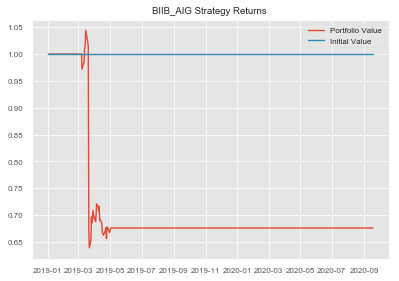

In [42]:
biib_aig.create_returns(1,'BIIB_AIG')

In [51]:
def create_portfolio(pairs):
    returns = np.zeros(433)
    for pair in pairs:
        strat = statarb(data0[pair[0]],data0[pair[1]],15,-2,2,15,start='2019-06-07',end='2020-01-01')
        strat.create_spread()
        strat.generate_signals()
        returns += strat.calculate_returns(1)
    
    returns = returns /returns[0]
    
    initial = returns/returns
    #initial = np.array(np.full(len(returns), 1))
    #initial = pd.DataFrame(data={'initial':initial})
    
    #Plotting Portfolio Value   
    with plt.style.context(['ggplot','seaborn-paper']):
        plt.plot(returns)
        plt.plot(initial)
        plt.title('Strategy Returns')
        plt.legend(loc=0)
        plt.show()

    return

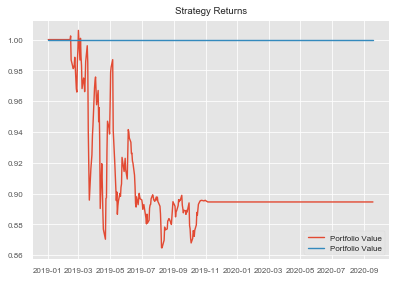

In [52]:
create_portfolio(cointegrated_cl0)

In [53]:
def portfolio_cluster(cluster):
    
    all_pairs=create_pairs(clusters_df[clusters_df.Cluster == cluster].index)

    data = pd.DataFrame()
    tickers = list(clusters_df[clusters_df.Cluster == cluster].index)
    for t in tickers:
        try:
            data[t] = wb.DataReader(t, data_source='yahoo', start='2008-1-1')['Adj Close']
        except:
            print('No data for {}'.format(t))
            tickers.remove(t)
    data = data.dropna(axis=1)

    train = data[:2877]
    pairs = create_pairs(train.columns)
    cointegrated = get_cointegrated(pairs,train)
    create_portfolio(cointegrated)

ADBE and AXP Pair Not Cointegrated :(
ADBE and AIG Pair Cointegrated at 99% Confidence Interval
ADBE and ANTM Pair Cointegrated at 99% Confidence Interval
ADBE and ADP Pair Not Cointegrated :(
ADBE and BIIB Pair Not Cointegrated :(
ADBE and BLK Pair Not Cointegrated :(
ADBE and COF Pair Not Cointegrated :(
ADBE and CAT Pair Not Cointegrated :(
ADBE and SCHW Pair Not Cointegrated :(
ADBE and CB Pair Not Cointegrated :(
ADBE and CL Pair Not Cointegrated :(
ADBE and COP Pair Not Cointegrated :(
ADBE and COST Pair Not Cointegrated :(
ADBE and CSX Pair Not Cointegrated :(
ADBE and DHR Pair Not Cointegrated :(
ADBE and D Pair Not Cointegrated :(
ADBE and DD Pair Not Cointegrated :(
ADBE and DUK Pair Not Cointegrated :(
ADBE and EOG Pair Not Cointegrated :(
ADBE and FDX Pair Not Cointegrated :(
ADBE and F Pair Not Cointegrated :(
ADBE and GD Pair Not Cointegrated :(
ADBE and HAL Pair Not Cointegrated :(
ADBE and ITW Pair Not Cointegrated :(
ADBE and KMB Pair Not Cointegrated :(
ADBE and LOW P

BIIB and NVDA Pair Not Cointegrated :(
BIIB and OXY Pair Not Cointegrated :(
BIIB and PNC Pair Not Cointegrated :(
BIIB and PRU Pair Not Cointegrated :(
BIIB and SPG Pair Not Cointegrated :(
BIIB and SO Pair Not Cointegrated :(
BIIB and SYK Pair Not Cointegrated :(
BIIB and BK Pair Not Cointegrated :(
BIIB and TMO Pair Not Cointegrated :(
BIIB and TJX Pair Not Cointegrated :(
BLK and ADBE Pair Not Cointegrated :(
BLK and AXP Pair Not Cointegrated :(
BLK and AIG Pair Cointegrated at 99% Confidence Interval
BLK and ANTM Pair Not Cointegrated :(
BLK and ADP Pair Not Cointegrated :(
BLK and BIIB Pair Not Cointegrated :(
BLK and COF Pair Not Cointegrated :(
BLK and CAT Pair Not Cointegrated :(
BLK and SCHW Pair Not Cointegrated :(
BLK and CB Pair Not Cointegrated :(
BLK and CL Pair Not Cointegrated :(
BLK and COP Pair Not Cointegrated :(
BLK and COST Pair Not Cointegrated :(
BLK and CSX Pair Not Cointegrated :(
BLK and DHR Pair Not Cointegrated :(
BLK and D Pair Not Cointegrated :(
BLK and 

CL and TMO Pair Not Cointegrated :(
CL and TJX Pair Cointegrated at 90% Confidence Interval
Exception: Symbol not in Dataframe
COP and ADBE Pair Not Cointegrated :(
COP and AXP Pair Not Cointegrated :(
COP and AIG Pair Cointegrated at 99% Confidence Interval
COP and ANTM Pair Not Cointegrated :(
COP and ADP Pair Not Cointegrated :(
COP and BIIB Pair Not Cointegrated :(
COP and BLK Pair Not Cointegrated :(
COP and COF Pair Not Cointegrated :(
COP and CAT Pair Not Cointegrated :(
COP and SCHW Pair Not Cointegrated :(
COP and CB Pair Not Cointegrated :(
COP and CL Pair Not Cointegrated :(
COP and COST Pair Not Cointegrated :(
COP and CSX Pair Not Cointegrated :(
COP and DHR Pair Not Cointegrated :(
COP and D Pair Not Cointegrated :(
COP and DD Pair Not Cointegrated :(
COP and DUK Pair Not Cointegrated :(
COP and EOG Pair Not Cointegrated :(
COP and FDX Pair Not Cointegrated :(
COP and F Pair Not Cointegrated :(
COP and GD Pair Not Cointegrated :(
COP and HAL Pair Not Cointegrated :(
COP a

DUK and AIG Pair Cointegrated at 99% Confidence Interval
DUK and ANTM Pair Not Cointegrated :(
DUK and ADP Pair Not Cointegrated :(
DUK and BIIB Pair Not Cointegrated :(
DUK and BLK Pair Not Cointegrated :(
DUK and COF Pair Cointegrated at 90% Confidence Interval
Exception: Symbol not in Dataframe
DUK and CAT Pair Not Cointegrated :(
DUK and SCHW Pair Not Cointegrated :(
DUK and CB Pair Not Cointegrated :(
DUK and CL Pair Not Cointegrated :(
DUK and COP Pair Not Cointegrated :(
DUK and COST Pair Not Cointegrated :(
DUK and CSX Pair Not Cointegrated :(
DUK and DHR Pair Not Cointegrated :(
DUK and D Pair Not Cointegrated :(
DUK and DD Pair Not Cointegrated :(
DUK and EOG Pair Not Cointegrated :(
DUK and FDX Pair Not Cointegrated :(
DUK and F Pair Not Cointegrated :(
DUK and GD Pair Not Cointegrated :(
DUK and HAL Pair Not Cointegrated :(
DUK and ITW Pair Not Cointegrated :(
DUK and KMB Pair Not Cointegrated :(
DUK and LOW Pair Not Cointegrated :(
DUK and MDLZ Pair Not Cointegrated :(
DUK

ITW and DHR Pair Not Cointegrated :(
ITW and D Pair Not Cointegrated :(
ITW and DD Pair Not Cointegrated :(
ITW and DUK Pair Not Cointegrated :(
ITW and EOG Pair Not Cointegrated :(
ITW and FDX Pair Not Cointegrated :(
ITW and F Pair Not Cointegrated :(
ITW and GD Pair Not Cointegrated :(
ITW and HAL Pair Not Cointegrated :(
ITW and KMB Pair Not Cointegrated :(
ITW and LOW Pair Not Cointegrated :(
ITW and MDLZ Pair Not Cointegrated :(
ITW and NEE Pair Not Cointegrated :(
ITW and NVDA Pair Not Cointegrated :(
ITW and OXY Pair Not Cointegrated :(
ITW and PNC Pair Not Cointegrated :(
ITW and PRU Pair Not Cointegrated :(
ITW and SPG Pair Not Cointegrated :(
ITW and SO Pair Not Cointegrated :(
ITW and SYK Pair Not Cointegrated :(
ITW and BK Pair Not Cointegrated :(
ITW and TMO Pair Not Cointegrated :(
ITW and TJX Pair Not Cointegrated :(
KMB and ADBE Pair Not Cointegrated :(
KMB and AXP Pair Not Cointegrated :(
KMB and AIG Pair Cointegrated at 99% Confidence Interval
KMB and ANTM Pair Not C

OXY and LOW Pair Not Cointegrated :(
OXY and MDLZ Pair Not Cointegrated :(
OXY and NEE Pair Not Cointegrated :(
OXY and NVDA Pair Not Cointegrated :(
OXY and PNC Pair Not Cointegrated :(
OXY and PRU Pair Not Cointegrated :(
OXY and SPG Pair Not Cointegrated :(
OXY and SO Pair Not Cointegrated :(
OXY and SYK Pair Not Cointegrated :(
OXY and BK Pair Not Cointegrated :(
OXY and TMO Pair Not Cointegrated :(
OXY and TJX Pair Not Cointegrated :(
PNC and ADBE Pair Not Cointegrated :(
PNC and AXP Pair Not Cointegrated :(
PNC and AIG Pair Cointegrated at 99% Confidence Interval
PNC and ANTM Pair Not Cointegrated :(
PNC and ADP Pair Not Cointegrated :(
PNC and BIIB Pair Not Cointegrated :(
PNC and BLK Pair Not Cointegrated :(
PNC and COF Pair Not Cointegrated :(
PNC and CAT Pair Not Cointegrated :(
PNC and SCHW Pair Not Cointegrated :(
PNC and CB Pair Not Cointegrated :(
PNC and CL Pair Not Cointegrated :(
PNC and COP Pair Not Cointegrated :(
PNC and COST Pair Not Cointegrated :(
PNC and CSX Pai

BK and F Pair Not Cointegrated :(
BK and GD Pair Not Cointegrated :(
BK and HAL Pair Not Cointegrated :(
BK and ITW Pair Not Cointegrated :(
BK and KMB Pair Not Cointegrated :(
BK and LOW Pair Not Cointegrated :(
BK and MDLZ Pair Not Cointegrated :(
BK and NEE Pair Not Cointegrated :(
BK and NVDA Pair Not Cointegrated :(
BK and OXY Pair Cointegrated at 90% Confidence Interval
Exception: Symbol not in Dataframe
BK and PNC Pair Not Cointegrated :(
BK and PRU Pair Not Cointegrated :(
BK and SPG Pair Not Cointegrated :(
BK and SO Pair Cointegrated at 90% Confidence Interval
Exception: Symbol not in Dataframe
BK and SYK Pair Not Cointegrated :(
BK and TMO Pair Not Cointegrated :(
BK and TJX Pair Not Cointegrated :(
TMO and ADBE Pair Not Cointegrated :(
TMO and AXP Pair Not Cointegrated :(
TMO and AIG Pair Cointegrated at 99% Confidence Interval
TMO and ANTM Pair Cointegrated at 90% Confidence Interval
Exception: Symbol not in Dataframe
TMO and ADP Pair Not Cointegrated :(
TMO and BIIB Pair 

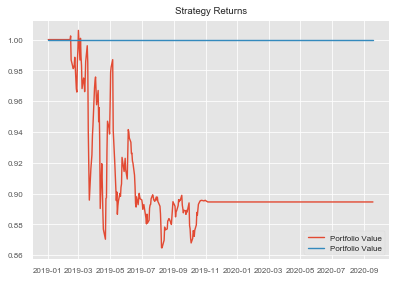

In [54]:
portfolio_cluster(0)

Well... Not too good...

In [ ]:
### Notebook based upon a similar notebook by Lamarcus Coleman